In [1]:
!pip install pandas seaborn

In [2]:
import pandas as pd
import seaborn as sns
import os
import glob
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Performance Analysis - Distributed Computing Benchmarks

This notebook analyzes performance metrics from distributed computing benchmarks across three scaling scenarios:
- **Strong Scaling (SS)**: Fixed problem size with increasing resources
- **Weak Scaling (WS)**: Problem size scales proportionally with resources
- **Worker Sweep (W-)**: Analysis across different worker configurations

## 1. Load and Categorize Data

In [3]:
# Initialize log directory
LOG_DIR = "/home/amber-intel/ritik/iisc-deas-project-1/logs/project-test-single-socket"

print(f"Log Directory: {LOG_DIR}")
print(f"Directory exists: {os.path.exists(LOG_DIR)}")

Log Directory: /home/amber-intel/ritik/iisc-deas-project-1/logs/project-test-single-socket
Directory exists: True


In [4]:
# Read all CSV files from the log directory
csv_files = glob.glob(os.path.join(LOG_DIR, "*.csv"))
print(f"Found {len(csv_files)} CSV file(s):\n")

# Categorize files by type
strong_scaling_files = []
weak_scaling_files = []
worker_sweep_files = []

for csv_file in csv_files:
    filename = os.path.basename(csv_file)
    print(f"  - {filename}")
    
    if filename.startswith('SS'):
        strong_scaling_files.append(csv_file)
    elif filename.startswith('WS'):
        weak_scaling_files.append(csv_file)
    elif filename.startswith('W-'):
        worker_sweep_files.append(csv_file)

print(f"\n\nCategorization:")
print(f"  Strong Scaling (SS): {len(strong_scaling_files)} files")
print(f"  Weak Scaling (WS): {len(weak_scaling_files)} files")
print(f"  Worker Sweep (W-): {len(worker_sweep_files)} files")

Found 37 CSV file(s):

  - WS-64_1W-64C.csv
  - SS-8_1W-8C.csv
  - SS-40_1W-40C.csv
  - W-8-8_8W-8C.csv
  - WS-40_1W-40C.csv
  - SS-36_1W-36C.csv
  - WS-12_1W-12C.csv
  - WS-24_1W-24C.csv
  - SS-56_1W-56C.csv
  - WS-28_1W-28C.csv
  - W-2-32_2W-32C.csv
  - SS-4_1W-4C.csv
  - WS-16_1W-16C.csv
  - WS-44_1W-44C.csv
  - SS-64_1W-64C.csv
  - SS-60_1W-60C.csv
  - WS-60_1W-60C.csv
  - SS-20_1W-20C.csv
  - WS-20_1W-20C.csv
  - SS-24_1W-24C.csv
  - SS-48_1W-48C.csv
  - W-16-4_16W-4C.csv
  - WS-48_1W-48C.csv
  - SS-44_1W-44C.csv
  - WS-4_1W-4C.csv
  - SS-16_1W-16C.csv
  - W-4-16_4W-16C.csv
  - W-1-64_1W-64C.csv
  - SS-12_1W-12C.csv
  - SS-52_1W-52C.csv
  - WS-8_1W-8C.csv
  - WS-36_1W-36C.csv
  - WS-56_1W-56C.csv
  - SS-28_1W-28C.csv
  - SS-32_1W-32C.csv
  - WS-32_1W-32C.csv
  - WS-52_1W-52C.csv


Categorization:
  Strong Scaling (SS): 16 files
  Weak Scaling (WS): 16 files
  Worker Sweep (W-): 5 files


In [5]:
# Create dataframes for each category
def read_csv_files(file_list, category_name):
    """Read CSV files and combine them into a single dataframe."""
    if not file_list:
        print(f"No files found for {category_name}")
        return pd.DataFrame()
    
    dataframes = []
    for csv_file in file_list:
        df = pd.read_csv(csv_file)
        df['source_file'] = os.path.basename(csv_file)
        df['category'] = category_name
        dataframes.append(df)
        print(f"  {os.path.basename(csv_file)}: {len(df)} rows, {len(df.columns)} columns")
    
    combined = pd.concat(dataframes, ignore_index=True)
    return combined

print("Reading Strong Scaling files:")
df_strong_scaling = read_csv_files(strong_scaling_files, 'Strong Scaling')

print("\nReading Weak Scaling files:")
df_weak_scaling = read_csv_files(weak_scaling_files, 'Weak Scaling')

print("\nReading Worker Sweep files:")
df_worker_sweep = read_csv_files(worker_sweep_files, 'Worker Sweep')

print(f"\n{'='*60}")
print(f"Summary:")
print(f"  Strong Scaling: {len(df_strong_scaling)} rows")
print(f"  Weak Scaling: {len(df_weak_scaling)} rows")
print(f"  Worker Sweep: {len(df_worker_sweep)} rows")

Reading Strong Scaling files:
  SS-8_1W-8C.csv: 1 rows, 33 columns
  SS-40_1W-40C.csv: 1 rows, 40 columns
  SS-36_1W-36C.csv: 1 rows, 40 columns
  SS-56_1W-56C.csv: 1 rows, 47 columns
  SS-4_1W-4C.csv: 1 rows, 33 columns
  SS-64_1W-64C.csv: 1 rows, 47 columns
  SS-60_1W-60C.csv: 1 rows, 47 columns
  SS-20_1W-20C.csv: 1 rows, 40 columns
  SS-24_1W-24C.csv: 1 rows, 40 columns
  SS-48_1W-48C.csv: 1 rows, 47 columns
  SS-44_1W-44C.csv: 1 rows, 61 columns
  SS-16_1W-16C.csv: 1 rows, 40 columns
  SS-12_1W-12C.csv: 1 rows, 40 columns
  SS-52_1W-52C.csv: 1 rows, 47 columns
  SS-28_1W-28C.csv: 1 rows, 40 columns
  SS-32_1W-32C.csv: 1 rows, 40 columns

Reading Weak Scaling files:
  WS-64_1W-64C.csv: 1 rows, 47 columns
  WS-40_1W-40C.csv: 1 rows, 40 columns
  WS-12_1W-12C.csv: 1 rows, 33 columns
  WS-24_1W-24C.csv: 1 rows, 40 columns
  WS-28_1W-28C.csv: 1 rows, 40 columns
  WS-16_1W-16C.csv: 1 rows, 33 columns
  WS-44_1W-44C.csv: 1 rows, 40 columns
  WS-60_1W-60C.csv: 1 rows, 47 columns
  WS-20_1

In [6]:
# Create combined dataframe
all_dataframes = []

if not df_strong_scaling.empty:
    all_dataframes.append(df_strong_scaling)
if not df_weak_scaling.empty:
    all_dataframes.append(df_weak_scaling)
if not df_worker_sweep.empty:
    all_dataframes.append(df_worker_sweep)

if all_dataframes:
    df_combined = pd.concat(all_dataframes, ignore_index=True)
    print(f"Combined dataframe created with {len(df_combined)} total rows")
    print(f"Columns: {df_combined.columns.tolist()}")
else:
    df_combined = pd.DataFrame()
    print("No data available to combine")
    
num_stages_array = sorted(df_combined['num_stages'].unique())

Combined dataframe created with 37 total rows
Columns: ['num_workers', 'mem_per_worker', 'cores_per_worker', 'dataset_scale', 'num_rows', 'num_stages', 'num_tasks', 'remark', 'stage0_time', 'stage0_throughput', 'stage0_executorRunTime', 'stage0_executorCpuTime', 'stage0_jvmGCTime', 'stage0_recordsRead', 'stage0_bytesRead', 'stage1_time', 'stage1_throughput', 'stage1_executorRunTime', 'stage1_executorCpuTime', 'stage1_jvmGCTime', 'stage1_recordsRead', 'stage1_bytesRead', 'stage2_time', 'stage2_throughput', 'stage2_executorRunTime', 'stage2_executorCpuTime', 'stage2_jvmGCTime', 'stage2_recordsRead', 'stage2_bytesRead', 'E2E_time', 'E2E_throughput', 'source_file', 'category', 'stage3_time', 'stage3_throughput', 'stage3_executorRunTime', 'stage3_executorCpuTime', 'stage3_jvmGCTime', 'stage3_recordsRead', 'stage3_bytesRead', 'stage4_time', 'stage4_throughput', 'stage4_executorRunTime', 'stage4_executorCpuTime', 'stage4_jvmGCTime', 'stage4_recordsRead', 'stage4_bytesRead', 'stage5_time', 'st

In [20]:
# Calculate total_stage_time and average_stage_throughput for all dataframes
def calculate_stage_metrics(df):
    """Calculate total stage time and average stage throughput for each row."""
    df = df.copy()
    
    # Get all stage time columns (stage_1_time, stage_2_time, etc.)
    stage_time_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_time')]

    # Calculate total_stage_time by summing all stage times
    df['total_stage_time'] = df[stage_time_cols].sum(axis=1)
    
    # Get all stage throughput columns
    stage_throughput_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_throughput')]
    
    # Calculate average_stage_throughput (average across all stages)
    df['average_stage_throughput'] = df[stage_throughput_cols].mean(axis=1)
    
    # Get all executor run time columns
    executor_run_time_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_executorRunTime')]
    
    # Calculate Total_Executor_Run_Time by summing all executor run times
    df['Total_Executor_Run_Time'] = df[executor_run_time_cols].sum(axis=1)
    
    # Get all executor CPU time columns
    executor_cpu_time_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_executorCpuTime')]
    
    # Calculate Total_Executor_CPU_Time by summing all executor CPU times
    df['Total_Executor_CPU_Time'] = df[executor_cpu_time_cols].sum(axis=1)
    
    # Get all JVM GC time columns
    jvm_gc_time_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_jvmGCTime')]
    
    # Calculate Total_JVM_GC_Time by summing all JVM GC times
    df['Total_JVM_GC_Time'] = df[jvm_gc_time_cols].sum(axis=1)
    
    return df

# Apply to all dataframes
df_strong_scaling = calculate_stage_metrics(df_strong_scaling)
df_weak_scaling = calculate_stage_metrics(df_weak_scaling)
df_worker_sweep = calculate_stage_metrics(df_worker_sweep)

print("Stage metrics calculated successfully!")

print(f"\nSample from Strong Scaling:")
print(df_strong_scaling[['config_name' if 'config_name' in df_strong_scaling.columns else 'source_file', 'Total_Executor_Run_Time', 'Total_Executor_CPU_Time', 'Total_JVM_GC_Time']].head())

Stage metrics calculated successfully!

Sample from Strong Scaling:
        source_file  Total_Executor_Run_Time  Total_Executor_CPU_Time  \
0    SS-8_1W-8C.csv                 692997.0                 393752.0   
1  SS-40_1W-40C.csv                3773170.0                3399786.0   
2  SS-36_1W-36C.csv                3098904.0                2722742.0   
3  SS-56_1W-56C.csv                5393098.0                5102692.0   
4    SS-4_1W-4C.csv                 528453.0                 179574.0   

   Total_JVM_GC_Time  
0             7867.0  
1            25448.0  
2            24248.0  
3            34260.0  
4             6035.0  


## 2. Data Summary

The data has been successfully loaded and organized into:
- **df_strong_scaling**: Strong scaling experiments (SS prefix)
- **df_weak_scaling**: Weak scaling experiments (WS prefix)
- **df_worker_sweep**: Worker sweep experiments (W- prefix)
- **df_combined**: All SS, WS, and W- data combined
- **num_stages_array**: Array of unique stage counts across all experiments

## 3. Strong Scaling Analysis - Amdahl's Law

Analyzing the law of diminishing returns as we increase computing resources with a fixed dataset size (scale = 1.0).

In [8]:
# Prepare data for strong scaling analysis
df_ss = df_strong_scaling.copy()

# Create config_name for better readability
df_ss['config_name'] = (
    df_ss['num_workers'].astype(str) + 'W-' +
    df_ss['cores_per_worker'].astype(str) + 'C'
)

# Sort by total cores (workers * cores_per_worker)
df_ss['total_cores'] = df_ss['num_workers'] * df_ss['cores_per_worker']
df_ss = df_ss.sort_values('total_cores')

print("Strong Scaling Configurations:")
print(df_ss[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'E2E_time', 'E2E_throughput']])

Strong Scaling Configurations:
   config_name  num_workers  cores_per_worker  total_cores    E2E_time  \
4        1W-4C            1                 4            4  258.145192   
0        1W-8C            1                 8            8  243.043046   
12      1W-12C            1                12           12  193.875906   
11      1W-16C            1                16           16  219.203899   
7       1W-20C            1                20           20  187.034930   
8       1W-24C            1                24           24  217.270434   
14      1W-28C            1                28           28  182.008145   
15      1W-32C            1                32           32  194.738237   
2       1W-36C            1                36           36  212.501312   
1       1W-40C            1                40           40  219.952584   
10      1W-44C            1                44           44  203.598892   
9       1W-48C            1                48           48  213.597978   
13     

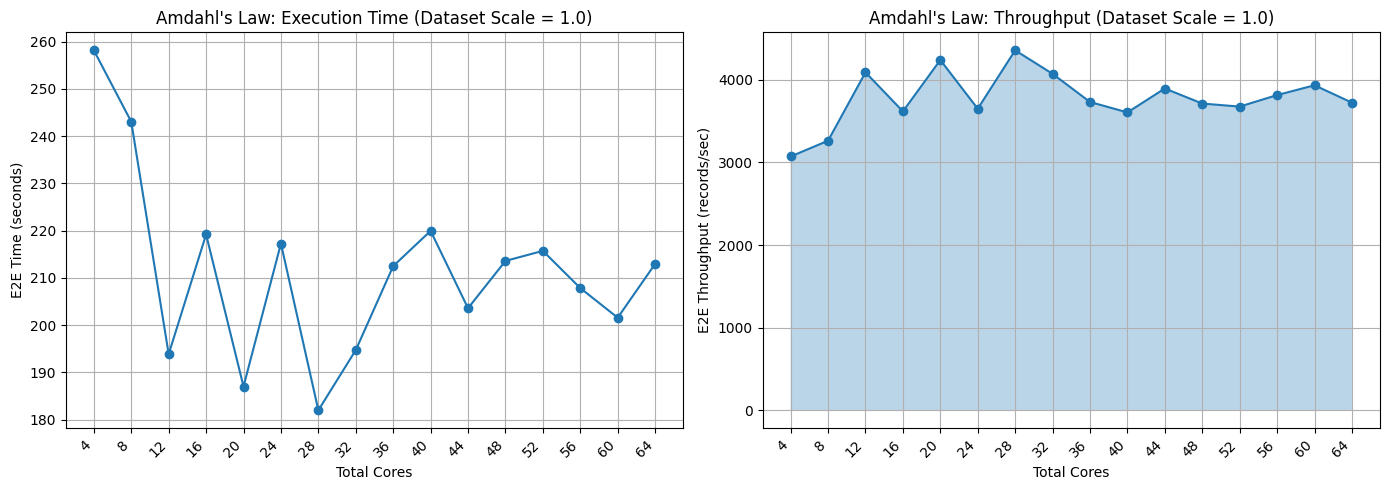


Speedup Analysis (relative to 1W-4C):
------------------------------------------------------------
1W-4C      | Time:  258.1s | Speedup: 1.00x
1W-8C      | Time:  243.0s | Speedup: 1.06x
1W-12C     | Time:  193.9s | Speedup: 1.33x
1W-16C     | Time:  219.2s | Speedup: 1.18x
1W-20C     | Time:  187.0s | Speedup: 1.38x
1W-24C     | Time:  217.3s | Speedup: 1.19x
1W-28C     | Time:  182.0s | Speedup: 1.42x
1W-32C     | Time:  194.7s | Speedup: 1.33x
1W-36C     | Time:  212.5s | Speedup: 1.21x
1W-40C     | Time:  220.0s | Speedup: 1.17x
1W-44C     | Time:  203.6s | Speedup: 1.27x
1W-48C     | Time:  213.6s | Speedup: 1.21x
1W-52C     | Time:  215.7s | Speedup: 1.20x
1W-56C     | Time:  207.9s | Speedup: 1.24x
1W-60C     | Time:  201.6s | Speedup: 1.28x
1W-64C     | Time:  213.0s | Speedup: 1.21x


In [9]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs Total Cores
ax1.plot(df_ss['total_cores'], df_ss['E2E_time'], marker='o')
ax1.set_xticks(df_ss['total_cores'])
ax1.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax1.set_xlabel('Total Cores')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title('Amdahl\'s Law: Execution Time (Dataset Scale = 1.0)')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs Total Cores
ax2.plot(df_ss['total_cores'], df_ss['E2E_throughput'], marker='o')
ax2.fill_between(df_ss['total_cores'], df_ss['E2E_throughput'], alpha=0.3)
ax2.set_xticks(df_ss['total_cores'])
ax2.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax2.set_xlabel('Total Cores')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title('Amdahl\'s Law: Throughput (Dataset Scale = 1.0)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print speedup analysis
base_time = df_ss.iloc[0]['E2E_time']
print(f"\nSpeedup Analysis (relative to {df_ss.iloc[0]['config_name']}):")
print("-" * 60)
for _, row in df_ss.iterrows():
    speedup = base_time / row['E2E_time']
    print(f"{row['config_name']:10s} | Time: {row['E2E_time']:6.1f}s | Speedup: {speedup:.2f}x")

## 4. Weak Scaling Analysis - Gustafson's Law

Analyzing how the system handles increasing problem sizes proportionally with computing resources. In weak scaling, both dataset scale and core count increase together.

In [10]:
# Prepare data for weak scaling analysis
df_ws = df_weak_scaling.copy()

# Create config_name for better readability
df_ws['config_name'] = (
    df_ws['num_workers'].astype(str) + 'W-' +
    df_ws['cores_per_worker'].astype(str) + 'C'
)

# Sort by total cores (workers * cores_per_worker)
df_ws['total_cores'] = df_ws['num_workers'] * df_ws['cores_per_worker']
df_ws = df_ws.sort_values('total_cores')

print("Weak Scaling Configurations:")
print(df_ws[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'dataset_scale', 'E2E_time', 'E2E_throughput']])

Weak Scaling Configurations:
   config_name  num_workers  cores_per_worker  total_cores  dataset_scale  \
10       1W-4C            1                 4            4         0.0625   
11       1W-8C            1                 8            8         0.1250   
2       1W-12C            1                12           12         0.1875   
5       1W-16C            1                16           16         0.2500   
8       1W-20C            1                20           20         0.3125   
3       1W-24C            1                24           24         0.3750   
4       1W-28C            1                28           28         0.4375   
14      1W-32C            1                32           32         0.5000   
12      1W-36C            1                36           36         0.5625   
1       1W-40C            1                40           40         0.6250   
6       1W-44C            1                44           44         0.6875   
9       1W-48C            1                48  

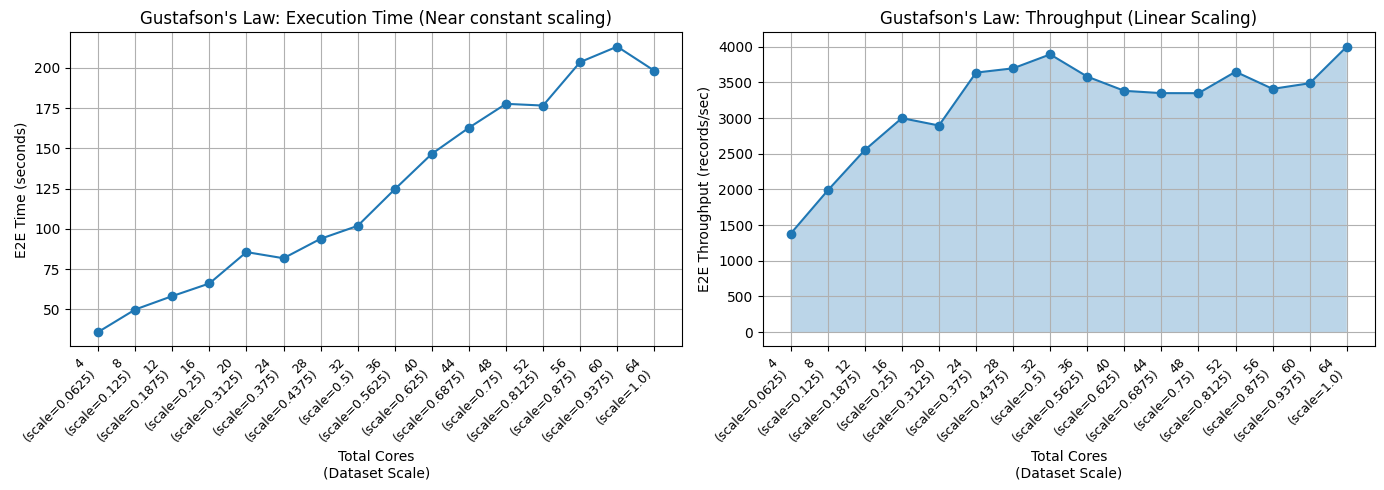


Weak Scaling Efficiency Analysis (relative to 1W-4C):
--------------------------------------------------------------------------------
1W-4C      | Cores:   4 | Scale:  0.1 | Time:   36.0s | Efficiency: 1.00
1W-8C      | Cores:   8 | Scale:  0.1 | Time:   50.0s | Efficiency: 0.72
1W-12C     | Cores:  12 | Scale:  0.2 | Time:   58.3s | Efficiency: 0.62
1W-16C     | Cores:  16 | Scale:  0.2 | Time:   66.1s | Efficiency: 0.54
1W-20C     | Cores:  20 | Scale:  0.3 | Time:   85.6s | Efficiency: 0.42
1W-24C     | Cores:  24 | Scale:  0.4 | Time:   81.8s | Efficiency: 0.44
1W-28C     | Cores:  28 | Scale:  0.4 | Time:   93.9s | Efficiency: 0.38
1W-32C     | Cores:  32 | Scale:  0.5 | Time:  101.9s | Efficiency: 0.35
1W-36C     | Cores:  36 | Scale:  0.6 | Time:  124.6s | Efficiency: 0.29
1W-40C     | Cores:  40 | Scale:  0.6 | Time:  146.6s | Efficiency: 0.25
1W-44C     | Cores:  44 | Scale:  0.7 | Time:  162.8s | Efficiency: 0.22
1W-48C     | Cores:  48 | Scale:  0.8 | Time:  177.6s | Effic

In [11]:
# Create X-axis label combining total cores and dataset scale
df_ws['x_label'] = df_ws['total_cores'].astype(str) + '\n(scale=' + df_ws['dataset_scale'].astype(str) + ')'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs Total Cores (with dataset scale)
x_positions = range(len(df_ws))
ax1.plot(x_positions, df_ws['E2E_time'], marker='o')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Total Cores\n(Dataset Scale)')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title('Gustafson\'s Law: Execution Time (Near constant scaling)')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs Total Cores (with dataset scale)
ax2.plot(x_positions, df_ws['E2E_throughput'], marker='o')
ax2.fill_between(x_positions, df_ws['E2E_throughput'], alpha=0.3)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Total Cores\n(Dataset Scale)')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title('Gustafson\'s Law: Throughput (Linear Scaling)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print efficiency analysis
base_time = df_ws.iloc[0]['E2E_time']
print(f"\nWeak Scaling Efficiency Analysis (relative to {df_ws.iloc[0]['config_name']}):")
print("-" * 80)
for _, row in df_ws.iterrows():
    efficiency = base_time / row['E2E_time']
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Scale: {row['dataset_scale']:4.1f} | Time: {row['E2E_time']:6.1f}s | Efficiency: {efficiency:.2f}")

### Stage Throughput Comparison: Strong vs Weak Scaling

Comparing average stage throughput between strong scaling (fixed dataset) and weak scaling (proportional dataset growth).

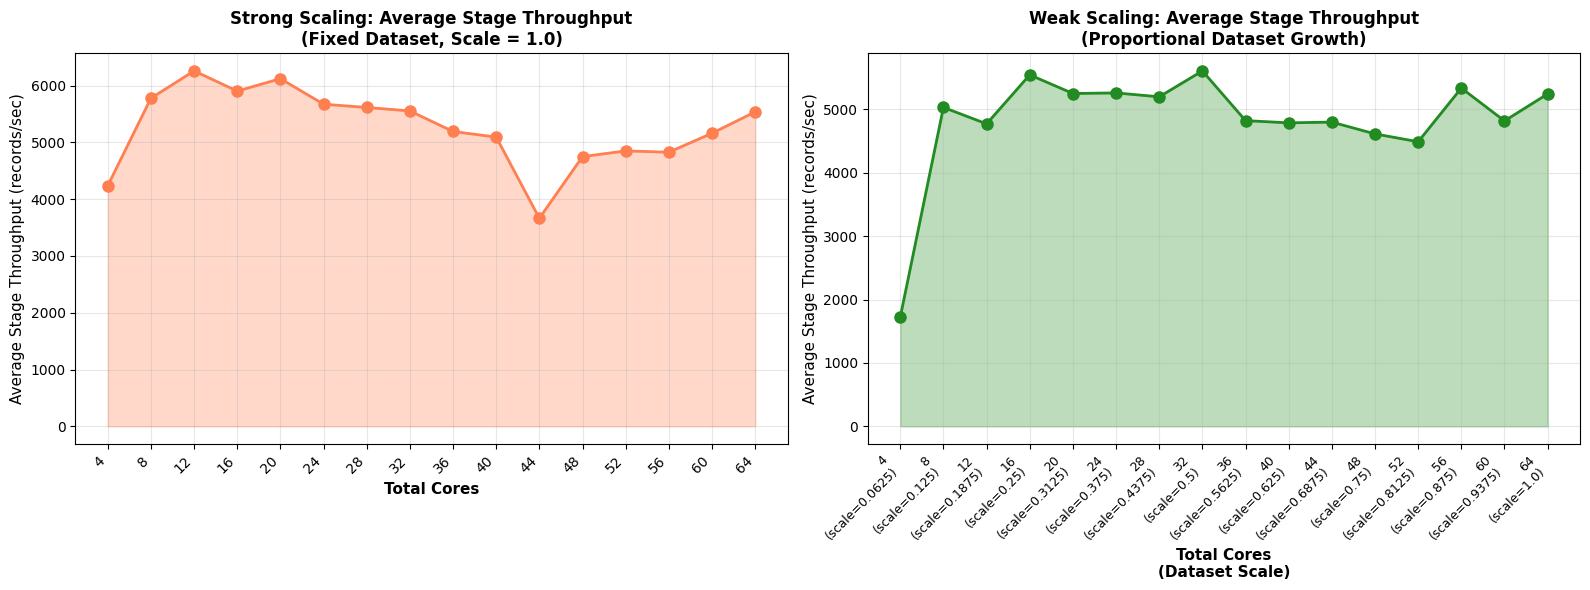


Stage Throughput Comparative Analysis:

Strong Scaling (Fixed Dataset):
------------------------------------------------------------------------------------------
1W-4C      | Cores:   4 | Avg Stage Throughput:   4237.2 records/sec
1W-8C      | Cores:   8 | Avg Stage Throughput:   5776.8 records/sec
1W-12C     | Cores:  12 | Avg Stage Throughput:   6257.0 records/sec
1W-16C     | Cores:  16 | Avg Stage Throughput:   5901.4 records/sec
1W-20C     | Cores:  20 | Avg Stage Throughput:   6120.7 records/sec
1W-24C     | Cores:  24 | Avg Stage Throughput:   5671.0 records/sec
1W-28C     | Cores:  28 | Avg Stage Throughput:   5613.1 records/sec
1W-32C     | Cores:  32 | Avg Stage Throughput:   5552.4 records/sec
1W-36C     | Cores:  36 | Avg Stage Throughput:   5190.6 records/sec
1W-40C     | Cores:  40 | Avg Stage Throughput:   5092.0 records/sec
1W-44C     | Cores:  44 | Avg Stage Throughput:   3662.8 records/sec
1W-48C     | Cores:  48 | Avg Stage Throughput:   4747.9 records/sec
1W-52C  

In [12]:
# Combined visualization: Average Stage Throughput for Strong and Weak Scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Strong Scaling - Average Stage Throughput
ax1.plot(df_ss['total_cores'], df_ss['average_stage_throughput'], marker='o', linewidth=2, markersize=8, color='coral')
ax1.fill_between(df_ss['total_cores'], df_ss['average_stage_throughput'], alpha=0.3, color='coral')
ax1.set_xticks(df_ss['total_cores'])
ax1.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax1.set_xlabel('Total Cores', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Stage Throughput (records/sec)', fontsize=11)
ax1.set_title('Strong Scaling: Average Stage Throughput\n(Fixed Dataset, Scale = 1.0)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Chart 2: Weak Scaling - Average Stage Throughput
x_positions_ws = range(len(df_ws))
ax2.plot(x_positions_ws, df_ws['average_stage_throughput'], marker='o', linewidth=2, markersize=8, color='forestgreen')
ax2.fill_between(x_positions_ws, df_ws['average_stage_throughput'], alpha=0.3, color='forestgreen')
ax2.set_xticks(x_positions_ws)
ax2.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Total Cores\n(Dataset Scale)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Average Stage Throughput (records/sec)', fontsize=11)
ax2.set_title('Weak Scaling: Average Stage Throughput\n(Proportional Dataset Growth)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparative analysis
print("\nStage Throughput Comparative Analysis:")
print("=" * 90)
print("\nStrong Scaling (Fixed Dataset):")
print("-" * 90)
for _, row in df_ss.iterrows():
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Avg Stage Throughput: {row['average_stage_throughput']:8.1f} records/sec")

print("\nWeak Scaling (Proportional Dataset):")
print("-" * 90)
for _, row in df_ws.iterrows():
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Scale: {row['dataset_scale']:4.1f} | Avg Stage Throughput: {row['average_stage_throughput']:8.1f} records/sec")

## 5. Worker Sweep Analysis

Analyzing the impact of different worker configurations while maintaining constant total compute resources (96 cores). This explores the trade-off between parallelism (number of workers) and per-worker resources (cores per worker).

In [13]:
# Prepare data for worker sweep analysis
df_worker = df_worker_sweep.copy()

# Create config_name for better readability
df_worker['config_name'] = (
    df_worker['num_workers'].astype(str) + 'W-' +
    df_worker['cores_per_worker'].astype(str) + 'C'
)

# Calculate total cores
df_worker['total_cores'] = df_worker['num_workers'] * df_worker['cores_per_worker']

# Sort by num_workers
df_worker = df_worker.sort_values('num_workers')

print("Worker Sweep Configurations:")
print(df_worker[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'E2E_time', 'E2E_throughput', "num_tasks"]])

Worker Sweep Configurations:
  config_name  num_workers  cores_per_worker  total_cores    E2E_time  \
4      1W-64C            1                64           64  200.753926   
1      2W-32C            2                32           64  190.423925   
3      4W-16C            4                16           64  123.547989   
0       8W-8C            8                 8           64  120.833487   
2      16W-4C           16                 4           64  118.728537   

   E2E_throughput  num_tasks  
4     3950.164351        189  
1     4164.450446        189  
3     6418.647593        189  
0     6562.841333        189  
2     6679.194595        189  


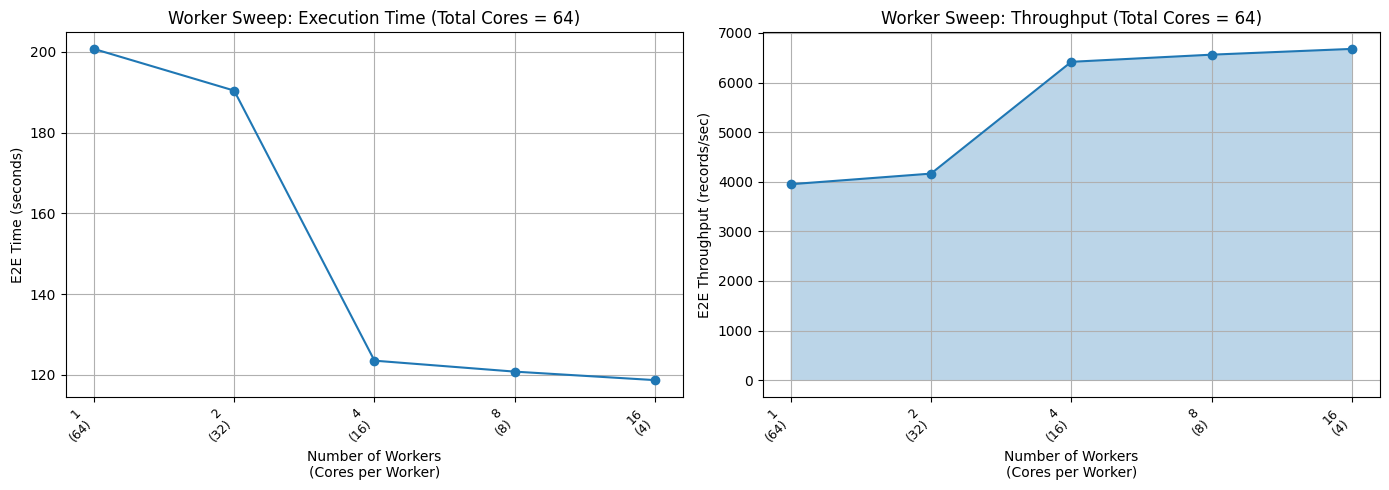


Worker Configuration Analysis (Total Cores = 64):
--------------------------------------------------------------------------------
1W-64C     | Workers:   1 | Cores/Worker:  64 | Time:  200.8s | Throughput:   3950.2
2W-32C     | Workers:   2 | Cores/Worker:  32 | Time:  190.4s | Throughput:   4164.5
4W-16C     | Workers:   4 | Cores/Worker:  16 | Time:  123.5s | Throughput:   6418.6
8W-8C      | Workers:   8 | Cores/Worker:   8 | Time:  120.8s | Throughput:   6562.8
16W-4C     | Workers:  16 | Cores/Worker:   4 | Time:  118.7s | Throughput:   6679.2


In [14]:
# Get the total cores value from the first row (all worker sweep configs should have same total cores)
target_total_cores = df_worker['total_cores'].iloc[0]

# Filter for configurations with the target total cores
df_worker_filtered = df_worker[df_worker['total_cores'] == target_total_cores].copy()

# Create X-axis label with num_workers and cores_per_worker
df_worker_filtered['x_label'] = df_worker_filtered['num_workers'].astype(str) + '\n(' + df_worker_filtered['cores_per_worker'].astype(str) + ')'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs num_workers
x_positions = range(len(df_worker_filtered))
ax1.plot(x_positions, df_worker_filtered['E2E_time'], marker='o')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(df_worker_filtered['x_label'], rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Number of Workers\n(Cores per Worker)')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title(f'Worker Sweep: Execution Time (Total Cores = {target_total_cores})')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs num_workers
ax2.plot(x_positions, df_worker_filtered['E2E_throughput'], marker='o')
ax2.fill_between(x_positions, df_worker_filtered['E2E_throughput'], alpha=0.3)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(df_worker_filtered['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Number of Workers\n(Cores per Worker)')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title(f'Worker Sweep: Throughput (Total Cores = {target_total_cores})')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print configuration analysis
print(f"\nWorker Configuration Analysis (Total Cores = {target_total_cores}):")
print("-" * 80)
for _, row in df_worker_filtered.iterrows():
    print(f"{row['config_name']:10s} | Workers: {row['num_workers']:3d} | Cores/Worker: {row['cores_per_worker']:3d} | Time: {row['E2E_time']:6.1f}s | Throughput: {row['E2E_throughput']:8.1f}")

## 6. Executor Time Analysis

Comparing Total Executor Run Time and Total Executor CPU Time across different core configurations.

In [15]:
# Prepare strong scaling data with executor metrics
df_ss_executor = df_strong_scaling.copy()

# Ensure we have the necessary columns
if 'total_cores' not in df_ss_executor.columns:
    df_ss_executor['total_cores'] = df_ss_executor['num_workers'] * df_ss_executor['cores_per_worker']

df_ss_executor = df_ss_executor.sort_values('total_cores')

print("Strong Scaling - Executor Time Metrics:")
print(df_ss_executor[['total_cores', 'Total_Executor_Run_Time', 'Total_Executor_CPU_Time']].to_string())

Strong Scaling - Executor Time Metrics:
    total_cores  Total_Executor_Run_Time  Total_Executor_CPU_Time
4             4                 528453.0                 179574.0
0             8                 692997.0                 393752.0
12           12                 970345.0                 697949.0
11           16                1372737.0                1059887.0
7            20                1652135.0                1318657.0
8            24                2051065.0                1748723.0
14           28                2411210.0                2068611.0
15           32                2620892.0                2259056.0
2            36                3098904.0                2722742.0
1            40                3773170.0                3399786.0
10           44                4068248.0                3691742.0
9            48                4686156.0                4300851.0
13           52                4892385.0                4591702.0
3            56                53930

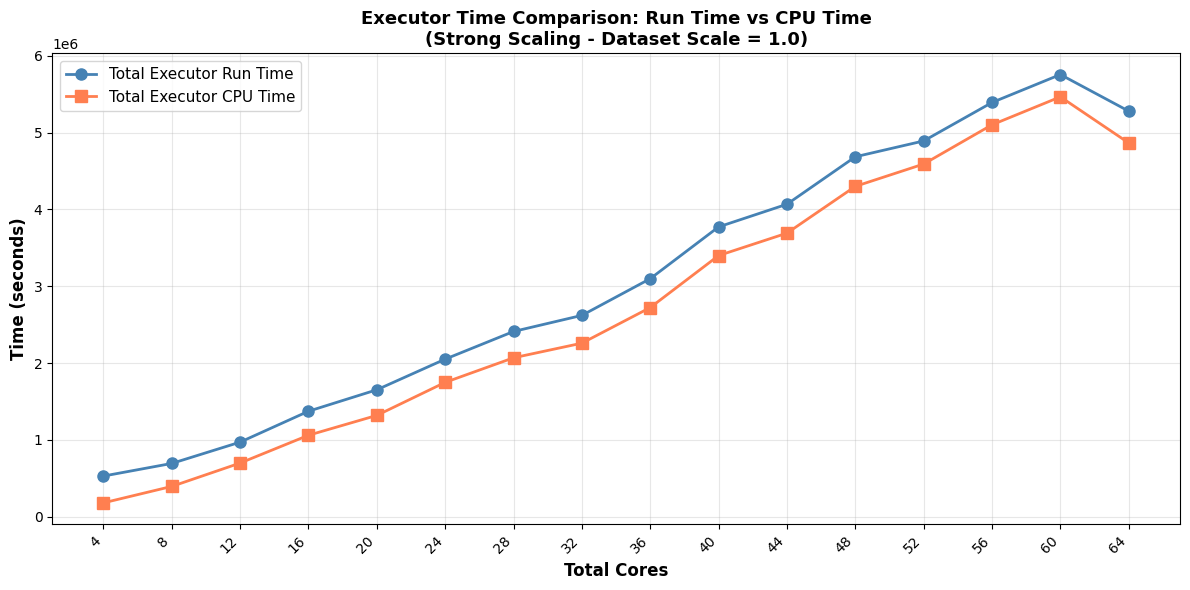


Detailed Executor Time Analysis:
Cores    Executor Run Time    Executor CPU Time    Difference     
--------------------------------------------------------------------------------
4                 528453.00s          179574.00s     348879.00s
8                 692997.00s          393752.00s     299245.00s
12                970345.00s          697949.00s     272396.00s
16               1372737.00s         1059887.00s     312850.00s
20               1652135.00s         1318657.00s     333478.00s
24               2051065.00s         1748723.00s     302342.00s
28               2411210.00s         2068611.00s     342599.00s
32               2620892.00s         2259056.00s     361836.00s
36               3098904.00s         2722742.00s     376162.00s
40               3773170.00s         3399786.00s     373384.00s
44               4068248.00s         3691742.00s     376506.00s
48               4686156.00s         4300851.00s     385305.00s
52               4892385.00s         4591702.00s  

In [16]:
# Create line chart comparing Total Executor Run Time and Total Executor CPU Time
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot Total_Executor_Run_Time
ax.plot(df_ss_executor['total_cores'], df_ss_executor['Total_Executor_Run_Time'], 
        marker='o', linewidth=2, markersize=8, label='Total Executor Run Time', color='steelblue')

# Plot Total_Executor_CPU_Time
ax.plot(df_ss_executor['total_cores'], df_ss_executor['Total_Executor_CPU_Time'], 
        marker='s', linewidth=2, markersize=8, label='Total Executor CPU Time', color='coral')

# Formatting
ax.set_xticks(df_ss_executor['total_cores'])
ax.set_xticklabels(df_ss_executor['total_cores'], rotation=45, ha='right')
ax.set_xlabel('Total Cores', fontsize=12, fontweight='bold')
ax.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Executor Time Comparison: Run Time vs CPU Time\n(Strong Scaling - Dataset Scale = 1.0)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Executor Time Analysis:")
print("=" * 80)
print(f"{'Cores':<8} {'Executor Run Time':<20} {'Executor CPU Time':<20} {'Difference':<15}")
print("-" * 80)
for _, row in df_ss_executor.iterrows():
    diff = row['Total_Executor_Run_Time'] - row['Total_Executor_CPU_Time']
    print(f"{row['total_cores']:<8} {row['Total_Executor_Run_Time']:>18.2f}s {row['Total_Executor_CPU_Time']:>18.2f}s {diff:>13.2f}s")

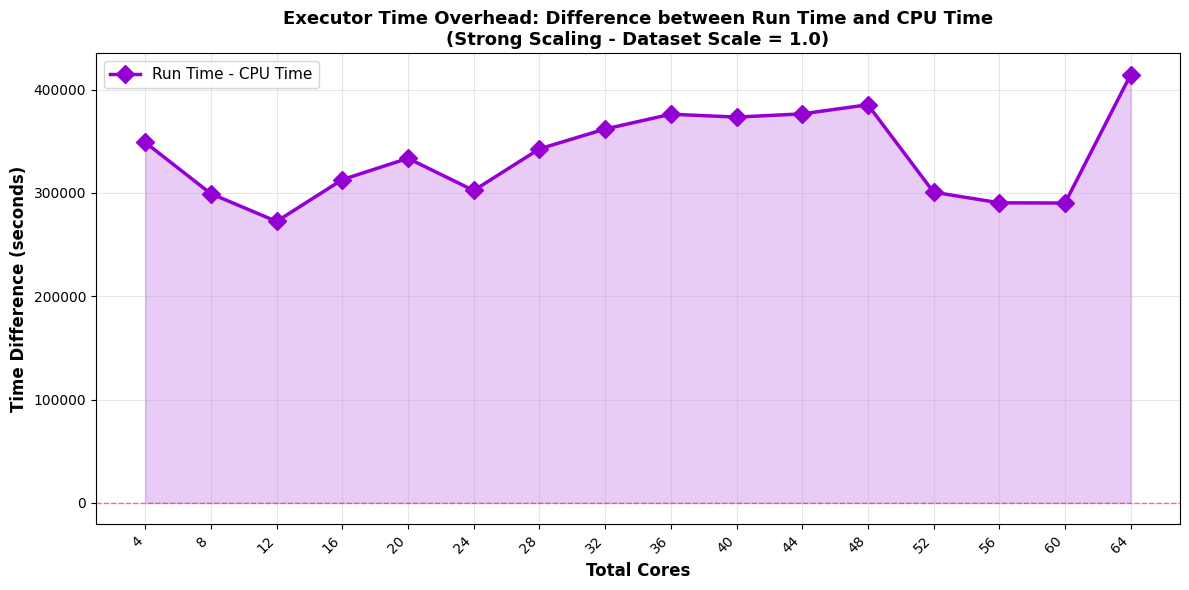


Time Difference Summary Statistics:
Metric                         Value               
----------------------------------------------------------------------
Average Difference:                     336302.81s
Minimum Difference:                     272396.00s
Maximum Difference:                     414556.00s
Std Deviation:                           42128.69s


In [17]:
# Create a separate graph showing the difference between Run Time and CPU Time
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Calculate the difference
df_ss_executor['Time_Difference'] = df_ss_executor['Total_Executor_Run_Time'] - df_ss_executor['Total_Executor_CPU_Time']

# Plot the difference
ax.plot(df_ss_executor['total_cores'], df_ss_executor['Time_Difference'], 
        marker='D', linewidth=2.5, markersize=9, color='darkviolet', label='Run Time - CPU Time')
ax.fill_between(df_ss_executor['total_cores'], df_ss_executor['Time_Difference'], alpha=0.2, color='darkviolet')

# Formatting
ax.set_xticks(df_ss_executor['total_cores'])
ax.set_xticklabels(df_ss_executor['total_cores'], rotation=45, ha='right')
ax.set_xlabel('Total Cores', fontsize=12, fontweight='bold')
ax.set_ylabel('Time Difference (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Executor Time Overhead: Difference between Run Time and CPU Time\n(Strong Scaling - Dataset Scale = 1.0)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTime Difference Summary Statistics:")
print("=" * 70)
print(f"{'Metric':<30} {'Value':<20}")
print("-" * 70)
print(f"{'Average Difference:':<30} {df_ss_executor['Time_Difference'].mean():>18.2f}s")
print(f"{'Minimum Difference:':<30} {df_ss_executor['Time_Difference'].min():>18.2f}s")
print(f"{'Maximum Difference:':<30} {df_ss_executor['Time_Difference'].max():>18.2f}s")
print(f"{'Std Deviation:':<30} {df_ss_executor['Time_Difference'].std():>18.2f}s")

## 7. Worker Sweep Executor Time Analysis

Analyzing executor time differences across different worker configurations with constant total cores.

In [21]:
# Prepare worker sweep data with executor metrics
df_worker_executor = df_worker_sweep.copy()

# Ensure we have the necessary columns
if 'total_cores' not in df_worker_executor.columns:
    df_worker_executor['total_cores'] = df_worker_executor['num_workers'] * df_worker_executor['cores_per_worker']

# Create config_name for better readability
df_worker_executor['config_name'] = (
    df_worker_executor['num_workers'].astype(str) + 'W-' +
    df_worker_executor['cores_per_worker'].astype(str) + 'C'
)

# Sort by num_workers
df_worker_executor = df_worker_executor.sort_values('num_workers')

# Calculate the time difference
df_worker_executor['Time_Difference'] = df_worker_executor['Total_Executor_Run_Time'] - df_worker_executor['Total_Executor_CPU_Time']

print("Worker Sweep - Executor Time Metrics:")
print(df_worker_executor[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 
                           'Total_Executor_Run_Time', 'Total_Executor_CPU_Time', 'Time_Difference']].to_string())

Worker Sweep - Executor Time Metrics:
  config_name  num_workers  cores_per_worker  total_cores  Total_Executor_Run_Time  Total_Executor_CPU_Time  Time_Difference
4      1W-64C            1                64           64                  5703905                  5268085           435820
1      2W-32C            2                32           64                  2498686                  2066639           432047
3      4W-16C            4                16           64                  1512754                  1098731           414023
0       8W-8C            8                 8           64                   839406                   415319           424087
2      16W-4C           16                 4           64                   733432                   238225           495207


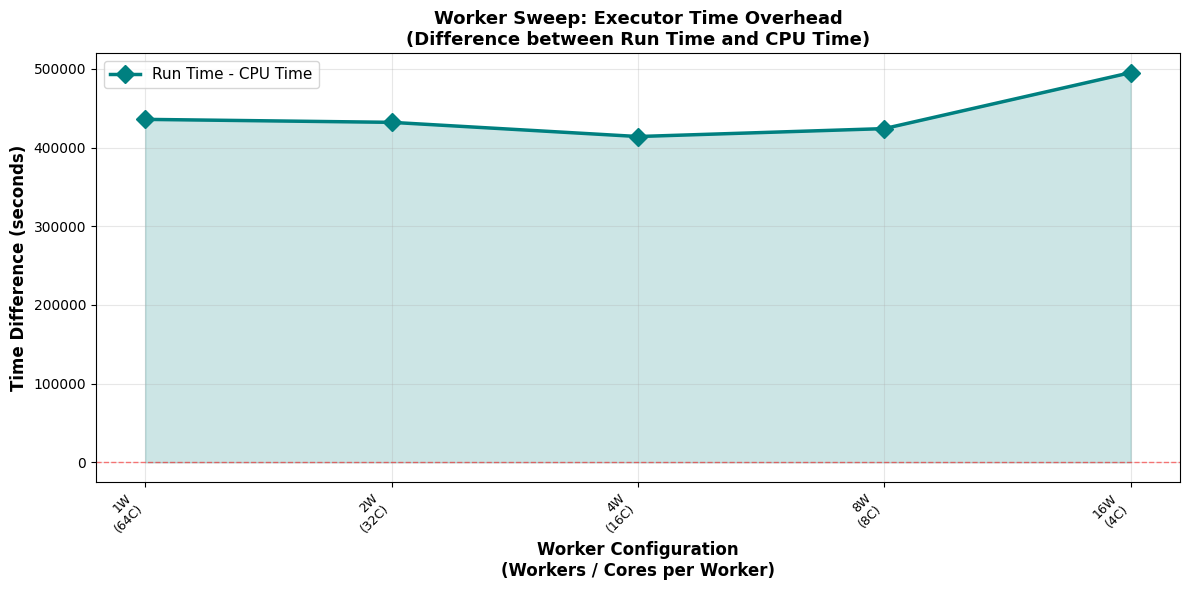


Worker Sweep - Detailed Executor Time Analysis:
Config       Workers    Cores/W    Total Cores  Run Time        CPU Time        Difference  
----------------------------------------------------------------------------------------------------
1W-64C       1          64         64              5703905.00s    5268085.00s  435820.00s
2W-32C       2          32         64              2498686.00s    2066639.00s  432047.00s
4W-16C       4          16         64              1512754.00s    1098731.00s  414023.00s
8W-8C        8          8          64               839406.00s     415319.00s  424087.00s
16W-4C       16         4          64               733432.00s     238225.00s  495207.00s


Time Difference Summary for Worker Sweep:
Metric                         Value               
----------------------------------------------------------------------
Average Difference:                     440236.80s
Minimum Difference:                     414023.00s
Maximum Difference:                   

In [22]:
# Create visualization showing executor time difference for worker sweep
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Create X-axis positions and labels
x_positions = range(len(df_worker_executor))
x_labels = [f"{row['num_workers']}W\n({row['cores_per_worker']}C)" 
            for _, row in df_worker_executor.iterrows()]

# Plot the difference
ax.plot(x_positions, df_worker_executor['Time_Difference'], 
        marker='D', linewidth=2.5, markersize=9, color='teal', label='Run Time - CPU Time')
ax.fill_between(x_positions, df_worker_executor['Time_Difference'], alpha=0.2, color='teal')

# Formatting
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=9)
ax.set_xlabel('Worker Configuration\n(Workers / Cores per Worker)', fontsize=12, fontweight='bold')
ax.set_ylabel('Time Difference (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Worker Sweep: Executor Time Overhead\n(Difference between Run Time and CPU Time)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nWorker Sweep - Detailed Executor Time Analysis:")
print("=" * 100)
print(f"{'Config':<12} {'Workers':<10} {'Cores/W':<10} {'Total Cores':<12} {'Run Time':<15} {'CPU Time':<15} {'Difference':<12}")
print("-" * 100)
for _, row in df_worker_executor.iterrows():
    print(f"{row['config_name']:<12} {row['num_workers']:<10} {row['cores_per_worker']:<10} "
          f"{row['total_cores']:<12} {row['Total_Executor_Run_Time']:>13.2f}s {row['Total_Executor_CPU_Time']:>13.2f}s "
          f"{row['Time_Difference']:>10.2f}s")

print("\n\nTime Difference Summary for Worker Sweep:")
print("=" * 70)
print(f"{'Metric':<30} {'Value':<20}")
print("-" * 70)
print(f"{'Average Difference:':<30} {df_worker_executor['Time_Difference'].mean():>18.2f}s")
print(f"{'Minimum Difference:':<30} {df_worker_executor['Time_Difference'].min():>18.2f}s")
print(f"{'Maximum Difference:':<30} {df_worker_executor['Time_Difference'].max():>18.2f}s")
print(f"{'Std Deviation:':<30} {df_worker_executor['Time_Difference'].std():>18.2f}s")

## 8. Worker Sweep JVM GC Time Analysis

Analyzing JVM Garbage Collection time across different worker configurations to understand GC overhead patterns.

In [24]:
# Prepare worker sweep data with JVM GC metrics

df_worker_jvm = df_worker_sweep.copy()

# Ensure we have the necessary columns

if 'total_cores' not in df_worker_jvm.columns:
    df_worker_jvm['total_cores'] = df_worker_jvm['num_workers'] * df_worker_jvm['cores_per_worker']
    df_worker_jvm = df_worker_jvm.sort_values('num_workers')

df_worker_jvm['config_name'] = df_worker_jvm['num_workers'].astype(str) + 'W-' +    df_worker_jvm['cores_per_worker'].astype(str) + 'C'

# Sort by num_workers
df_worker_jvm = df_worker_jvm.sort_values('num_workers')

print("Worker Sweep - JVM GC Time Metrics:")
print(df_worker_jvm[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'Total_JVM_GC_Time']].to_string())


Worker Sweep - JVM GC Time Metrics:
  config_name  num_workers  cores_per_worker  total_cores  Total_JVM_GC_Time
4      1W-64C            1                64           64              34443
1      2W-32C            2                32           64              19943
3      4W-16C            4                16           64              13683
0       8W-8C            8                 8           64              12350
2      16W-4C           16                 4           64               9096


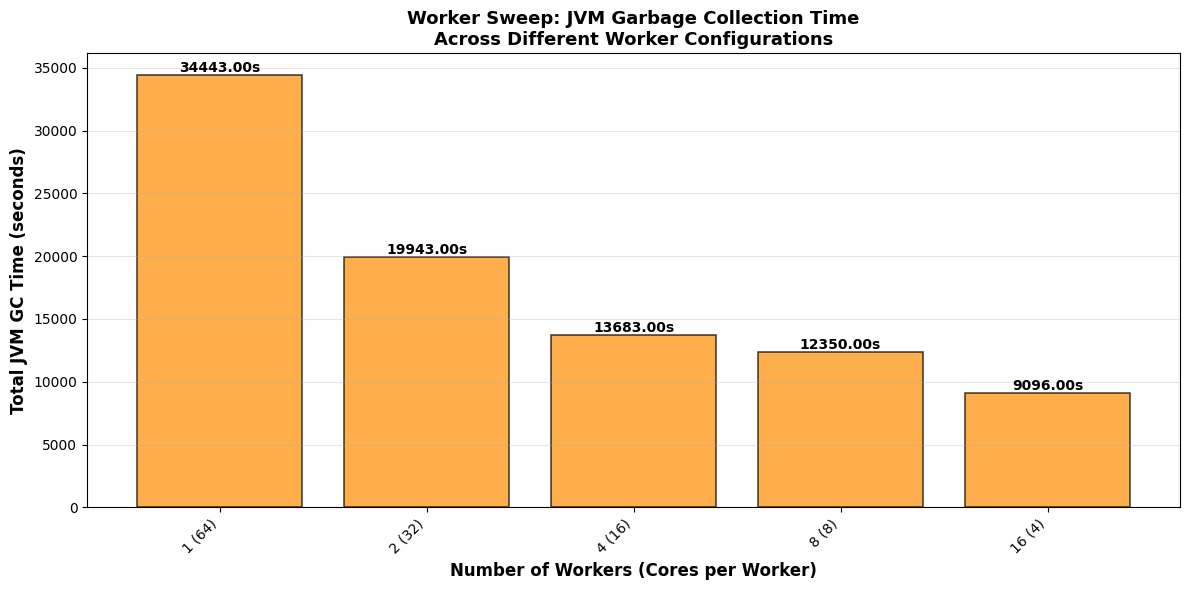


Worker Sweep - Detailed JVM GC Time Analysis:
Config       Workers    Cores/W    Total Cores  Total JVM GC Time   
------------------------------------------------------------------------------------------
1W-64C       1          64         64                     34443.00s
2W-32C       2          32         64                     19943.00s
4W-16C       4          16         64                     13683.00s
8W-8C        8          8          64                     12350.00s
16W-4C       16         4          64                      9096.00s


JVM GC Time Summary for Worker Sweep:
Metric                         Value               
----------------------------------------------------------------------
Average JVM GC Time:                     17903.00s
Minimum JVM GC Time:                      9096.00s
Maximum JVM GC Time:                     34443.00s
Std Deviation:                           10049.14s


In [25]:
# Create bar chart for JVM GC Time across worker configurations
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Create X-axis labels with format "num_workers (cores_per_worker)"
x_labels = [f"{row['num_workers']} ({row['cores_per_worker']})" 
            for _, row in df_worker_jvm.iterrows()]
x_positions = range(len(df_worker_jvm))

# Create bar chart
bars = ax.bar(x_positions, df_worker_jvm['Total_JVM_GC_Time'], 
              color='darkorange', alpha=0.7, edgecolor='black', linewidth=1.2)

# Add value labels on top of bars
for i, (pos, value) in enumerate(zip(x_positions, df_worker_jvm['Total_JVM_GC_Time'])):
    ax.text(pos, value, f'{value:.2f}s', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)
ax.set_xlabel('Number of Workers (Cores per Worker)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total JVM GC Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Worker Sweep: JVM Garbage Collection Time\nAcross Different Worker Configurations', 
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nWorker Sweep - Detailed JVM GC Time Analysis:")
print("=" * 90)
print(f"{'Config':<12} {'Workers':<10} {'Cores/W':<10} {'Total Cores':<12} {'Total JVM GC Time':<20}")
print("-" * 90)
for _, row in df_worker_jvm.iterrows():
    print(f"{row['config_name']:<12} {row['num_workers']:<10} {row['cores_per_worker']:<10} "
          f"{row['total_cores']:<12} {row['Total_JVM_GC_Time']:>18.2f}s")

print("\n\nJVM GC Time Summary for Worker Sweep:")
print("=" * 70)
print(f"{'Metric':<30} {'Value':<20}")
print("-" * 70)
print(f"{'Average JVM GC Time:':<30} {df_worker_jvm['Total_JVM_GC_Time'].mean():>18.2f}s")
print(f"{'Minimum JVM GC Time:':<30} {df_worker_jvm['Total_JVM_GC_Time'].min():>18.2f}s")
print(f"{'Maximum JVM GC Time:':<30} {df_worker_jvm['Total_JVM_GC_Time'].max():>18.2f}s")
print(f"{'Std Deviation:':<30} {df_worker_jvm['Total_JVM_GC_Time'].std():>18.2f}s")